In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209MI.txt'
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209bMI.txt'
path = './data/line_3/'
file = 'F_1_L23.I_T5209MI'
fileb = 'F_1_L23.I_T5209bMI'
def loadData(path,file_name):
    alldata = []
    for i in os.listdir('data/line_3'):
        
        path2 = path + i + '/' + i + '_' + file_name + '.txt'
        print(path)
        f = open(path2) 
        data = json.load(f)
        alldata.extend(data[file_name])
    return alldata

In [2]:
t = loadData(path,file)

./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/


In [3]:
tb = loadData(path,fileb)

./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/


In [4]:
print(len(t))
print(len(tb))

1711660
1853907


In [5]:
data = pd.DataFrame(t)
datab = pd.DataFrame(tb)

In [6]:
data.head()

,quality,ts,value
0,优,2018-04-14 08:01:10.014,138.299850
1,优,2018-04-14 08:01:11.271,138.198013
2,优,2018-04-14 08:02:43.591,138.299850
3,优,2018-04-14 08:02:44.839,136.884476
4,优,2018-04-14 08:02:48.646,136.772461


In [7]:
datab.head()

,quality,ts,value
0,优,2018-04-14 08:00:03.256,126.438721
1,优,2018-04-14 08:00:05.784,127.819687
2,优,2018-04-14 08:00:08.325,126.438721
3,优,2018-04-14 08:00:09.563,127.939774
4,优,2018-04-14 08:00:12.070,126.438721


In [8]:
data.value = pd.to_numeric(data.value, errors='ignore')
datab.value = pd.to_numeric(datab.value,errors = 'ignore')

data = data[data['value']> 0]
datab = datab[datab['value'] > 0]

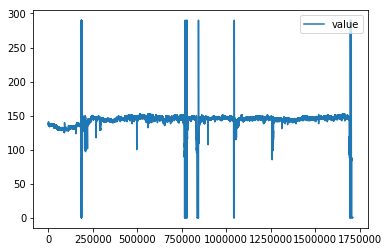

In [9]:
data.plot()

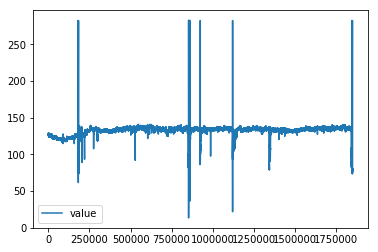

In [10]:
datab.plot()

In [11]:
new_ts = [data['ts'].iloc[i][0:13] for i in range(0,len(data))]

In [12]:
new_tsb = [datab['ts'].iloc[i][0:13] for i in range(0,len(datab))]

In [13]:
data.drop('ts',axis=1, inplace=True)
datab.drop('ts',axis = 1,inplace = True)

In [14]:
data.insert(1,'ts',new_ts)
datab.insert(1,'ts',new_tsb)

In [16]:
grouped = data['value'].groupby(data['ts'])
groupedb = datab['value'].groupby(datab['ts'])

In [17]:
d1 = grouped.mean()
d2 = groupedb.mean()

In [29]:
d1 = pd.DataFrame(d1)

In [31]:
d2 = pd.DataFrame(d2)

In [38]:
data_all = pd.merge(d1,d2,left_index= True, right_index=True)

In [39]:
data_all.head()

,value_x,value_y
ts,,
2018-04-14 08,138.622358,127.364318
2018-04-14 09,137.906772,127.204170
2018-04-14 10,136.766096,125.563310
2018-04-14 11,136.490709,125.564651
2018-04-14 12,136.522352,125.712914


Text(0, 0.5, 'F_1_L1.I_5209bMI_mean_value')

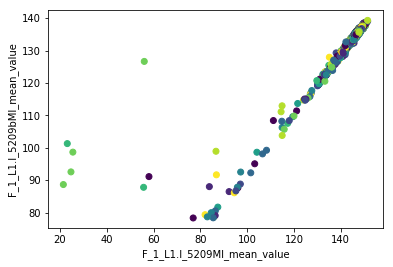

In [42]:
#提升机A电流与提升机B电流结果反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all.value_x,data_all.value_y,c = c,marker = 'o')
plt.xlabel('F_1_L1.I_5209MI_mean_value')
plt.ylabel('F_1_L1.I_5209bMI_mean_value')